# 🚦 Bangalore Traffic Wasted Time Prediction

# 1. Objective
Estimate the extra minutes wasted in Bangalore traffic beyond ideal travel time, using roadway, congestion and environmental indicators.

--- 


In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option('display.max_columns', None)



# 2. Load Dataset


In this section we load the raw dataset into the notebook and take a first look at its structure.


In [2]:
df = pd.read_csv(r"C:\great learning self paced\machine learning from scratch\ml projects\bangalore-traffic-wasted-time-prediction\data\raw\Banglore_traffic_Dataset.csv")
df.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [3]:
df.shape

(8936, 16)

# 3. Initial Exploration

Let us take a first look at the structure and basic statistics of the dataset.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                8936 non-null   object 
 1   Area Name                           8936 non-null   object 
 2   Road/Intersection Name              8936 non-null   object 
 3   Traffic Volume                      8936 non-null   int64  
 4   Average Speed                       8936 non-null   float64
 5   Travel Time Index                   8936 non-null   float64
 6   Congestion Level                    8936 non-null   float64
 7   Road Capacity Utilization           8936 non-null   float64
 8   Incident Reports                    8936 non-null   int64  
 9   Environmental Impact                8936 non-null   float64
 10  Public Transport Usage              8936 non-null   float64
 11  Traffic Signal Compliance           8936 no

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Traffic Volume,8936.0,29236.048120,13001.808801,4233.000000,19413.000000,27600.000000,38058.500000,72039.000000
Average Speed,8936.0,39.447427,10.707244,20.000000,31.775825,39.199368,46.644517,89.790843
Travel Time Index,8936.0,1.375554,0.165319,1.000039,1.242459,1.500000,1.500000,1.500000
Congestion Level,8936.0,80.818041,23.533182,5.160279,64.292905,92.389018,100.000000,100.000000
Road Capacity Utilization,8936.0,92.029215,16.583341,18.739771,97.354990,100.000000,100.000000,100.000000
Incident Reports,8936.0,1.570389,1.420047,0.000000,0.000000,1.000000,2.000000,10.000000
Environmental Impact,8936.0,108.472096,26.003618,58.466000,88.826000,105.200000,126.117000,194.078000
Public Transport Usage,8936.0,45.086651,20.208460,10.006853,27.341191,45.170684,62.426485,79.979744
Traffic Signal Compliance,8936.0,79.950243,11.585006,60.003933,69.828270,79.992773,89.957358,99.993652
Parking Usage,8936.0,75.155597,14.409394,50.020411,62.545895,75.317610,87.518589,99.995049


In [6]:
df.isnull().sum()

Date                                  0
Area Name                             0
Road/Intersection Name                0
Traffic Volume                        0
Average Speed                         0
Travel Time Index                     0
Congestion Level                      0
Road Capacity Utilization             0
Incident Reports                      0
Environmental Impact                  0
Public Transport Usage                0
Traffic Signal Compliance             0
Parking Usage                         0
Pedestrian and Cyclist Count          0
Weather Conditions                    0
Roadwork and Construction Activity    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.nunique()


Date                                   952
Area Name                                8
Road/Intersection Name                  16
Traffic Volume                        8100
Average Speed                         8572
Travel Time Index                     3711
Congestion Level                      5053
Road Capacity Utilization             2352
Incident Reports                        11
Environmental Impact                  8100
Public Transport Usage                8936
Traffic Signal Compliance             8936
Parking Usage                         8936
Pedestrian and Cyclist Count           148
Weather Conditions                       5
Roadwork and Construction Activity       2
dtype: int64

## 3.1 Visual Exploration

In this section we explore variable distributions, detect outliers and understand relationships between important features.


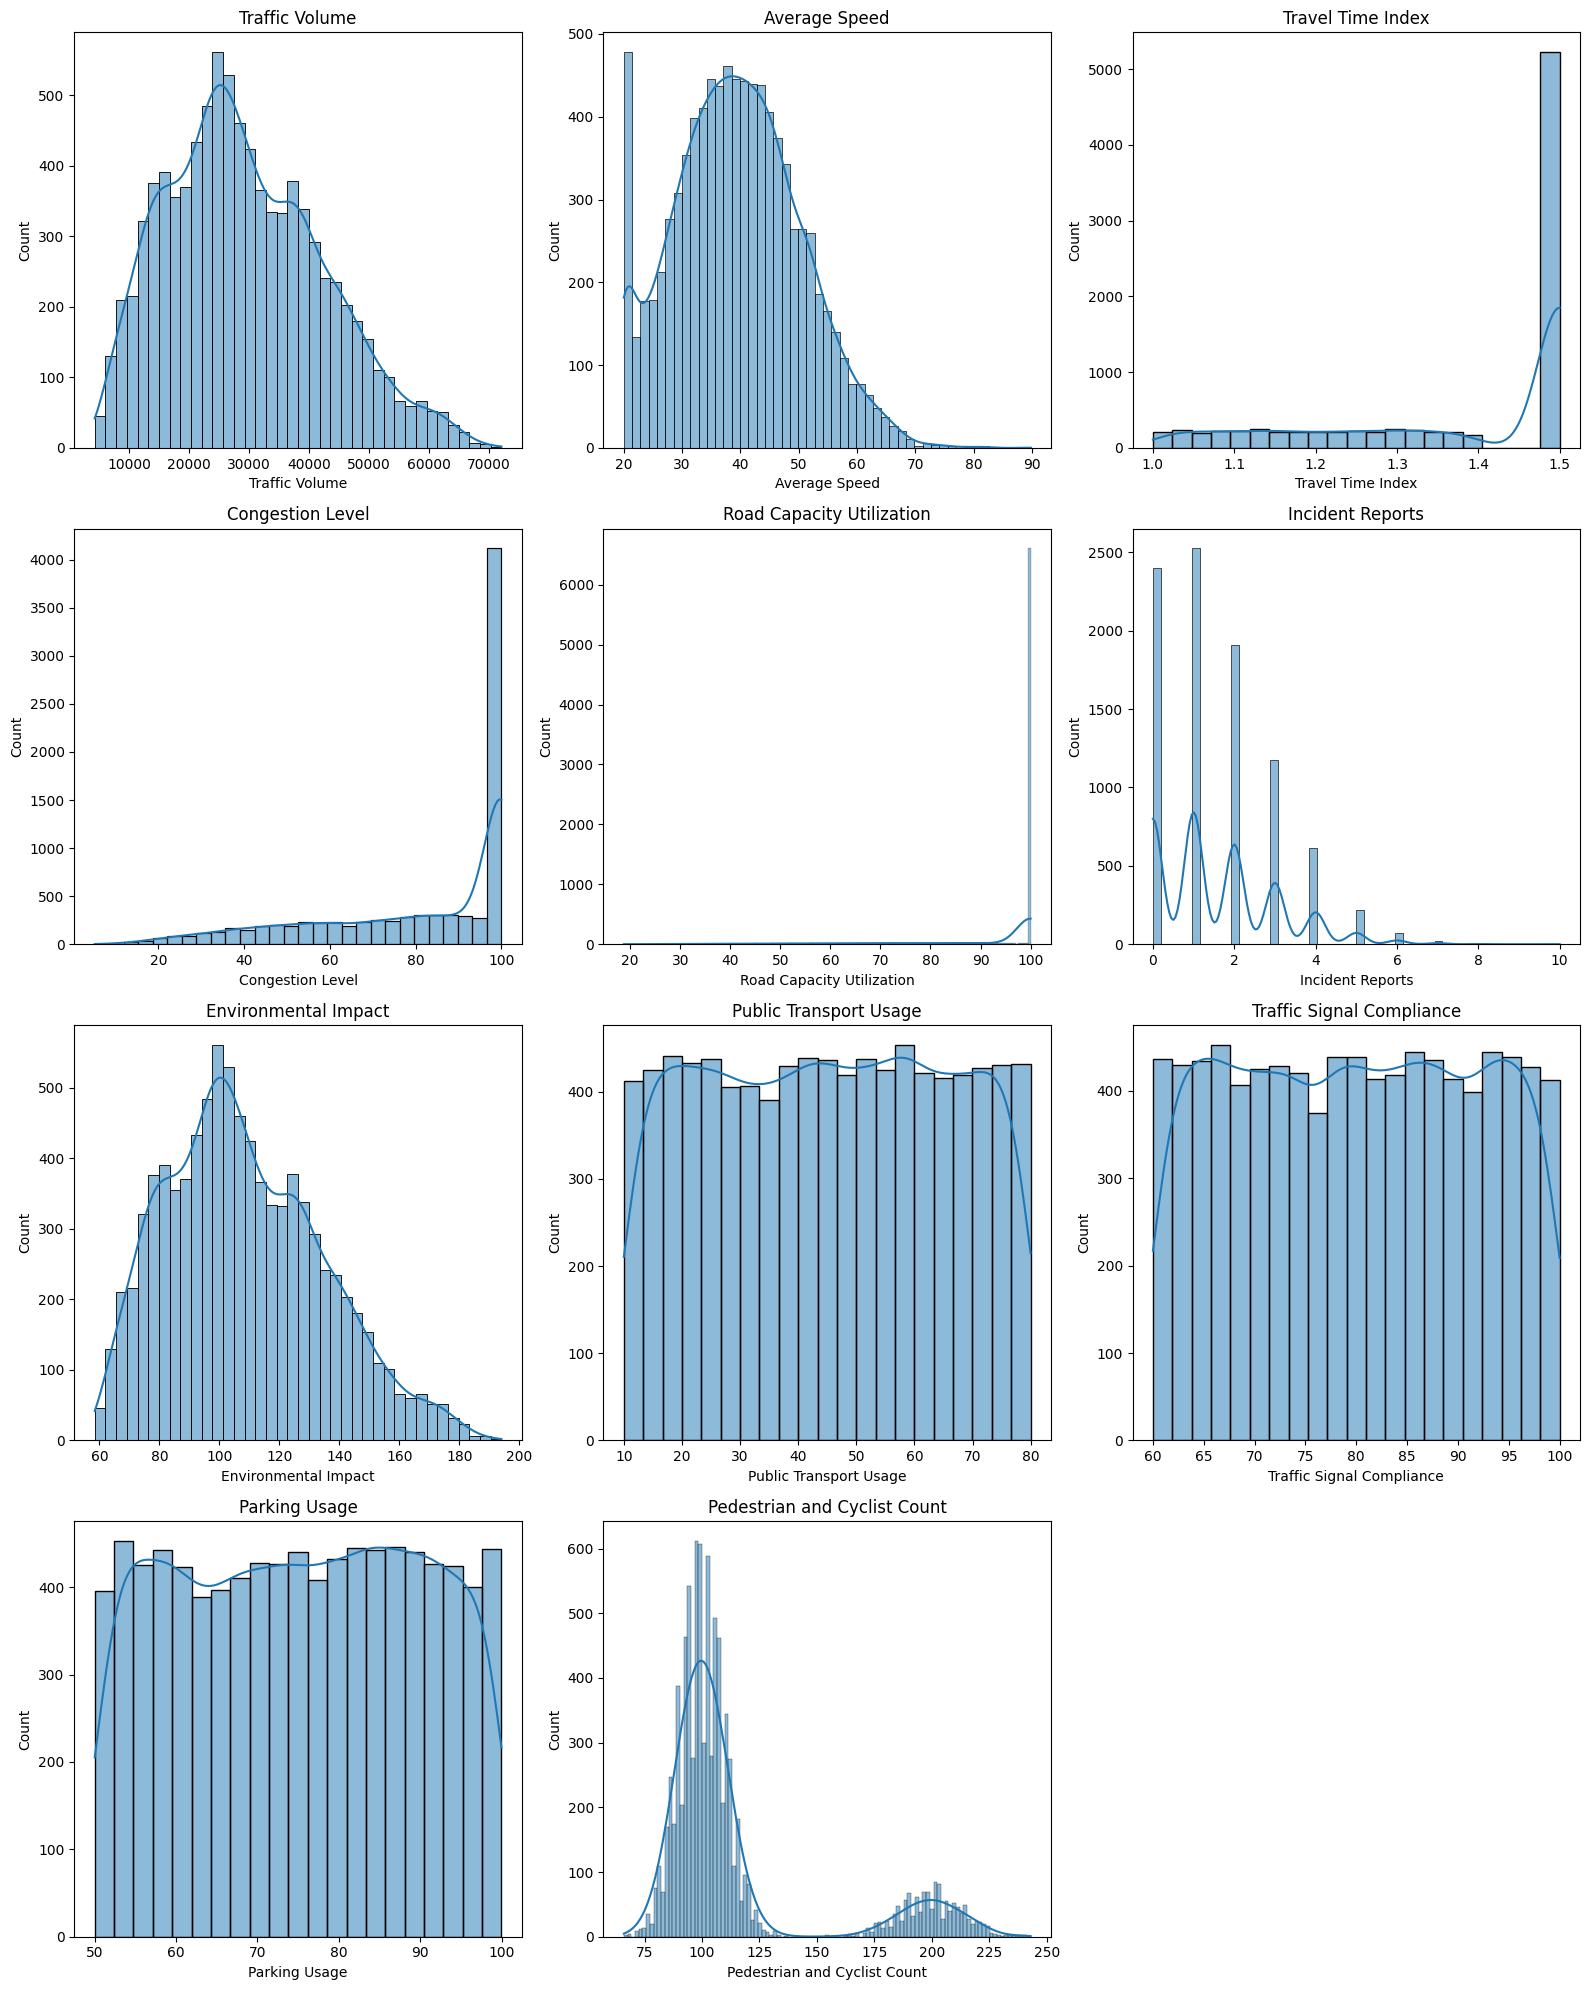

In [9]:
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

plt.figure(figsize=(16,20))

for i, col in enumerate(numeric_cols,1):
    plt.subplot(len(numeric_cols)// 3 + 1,3,i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

### Boxplot Analysis


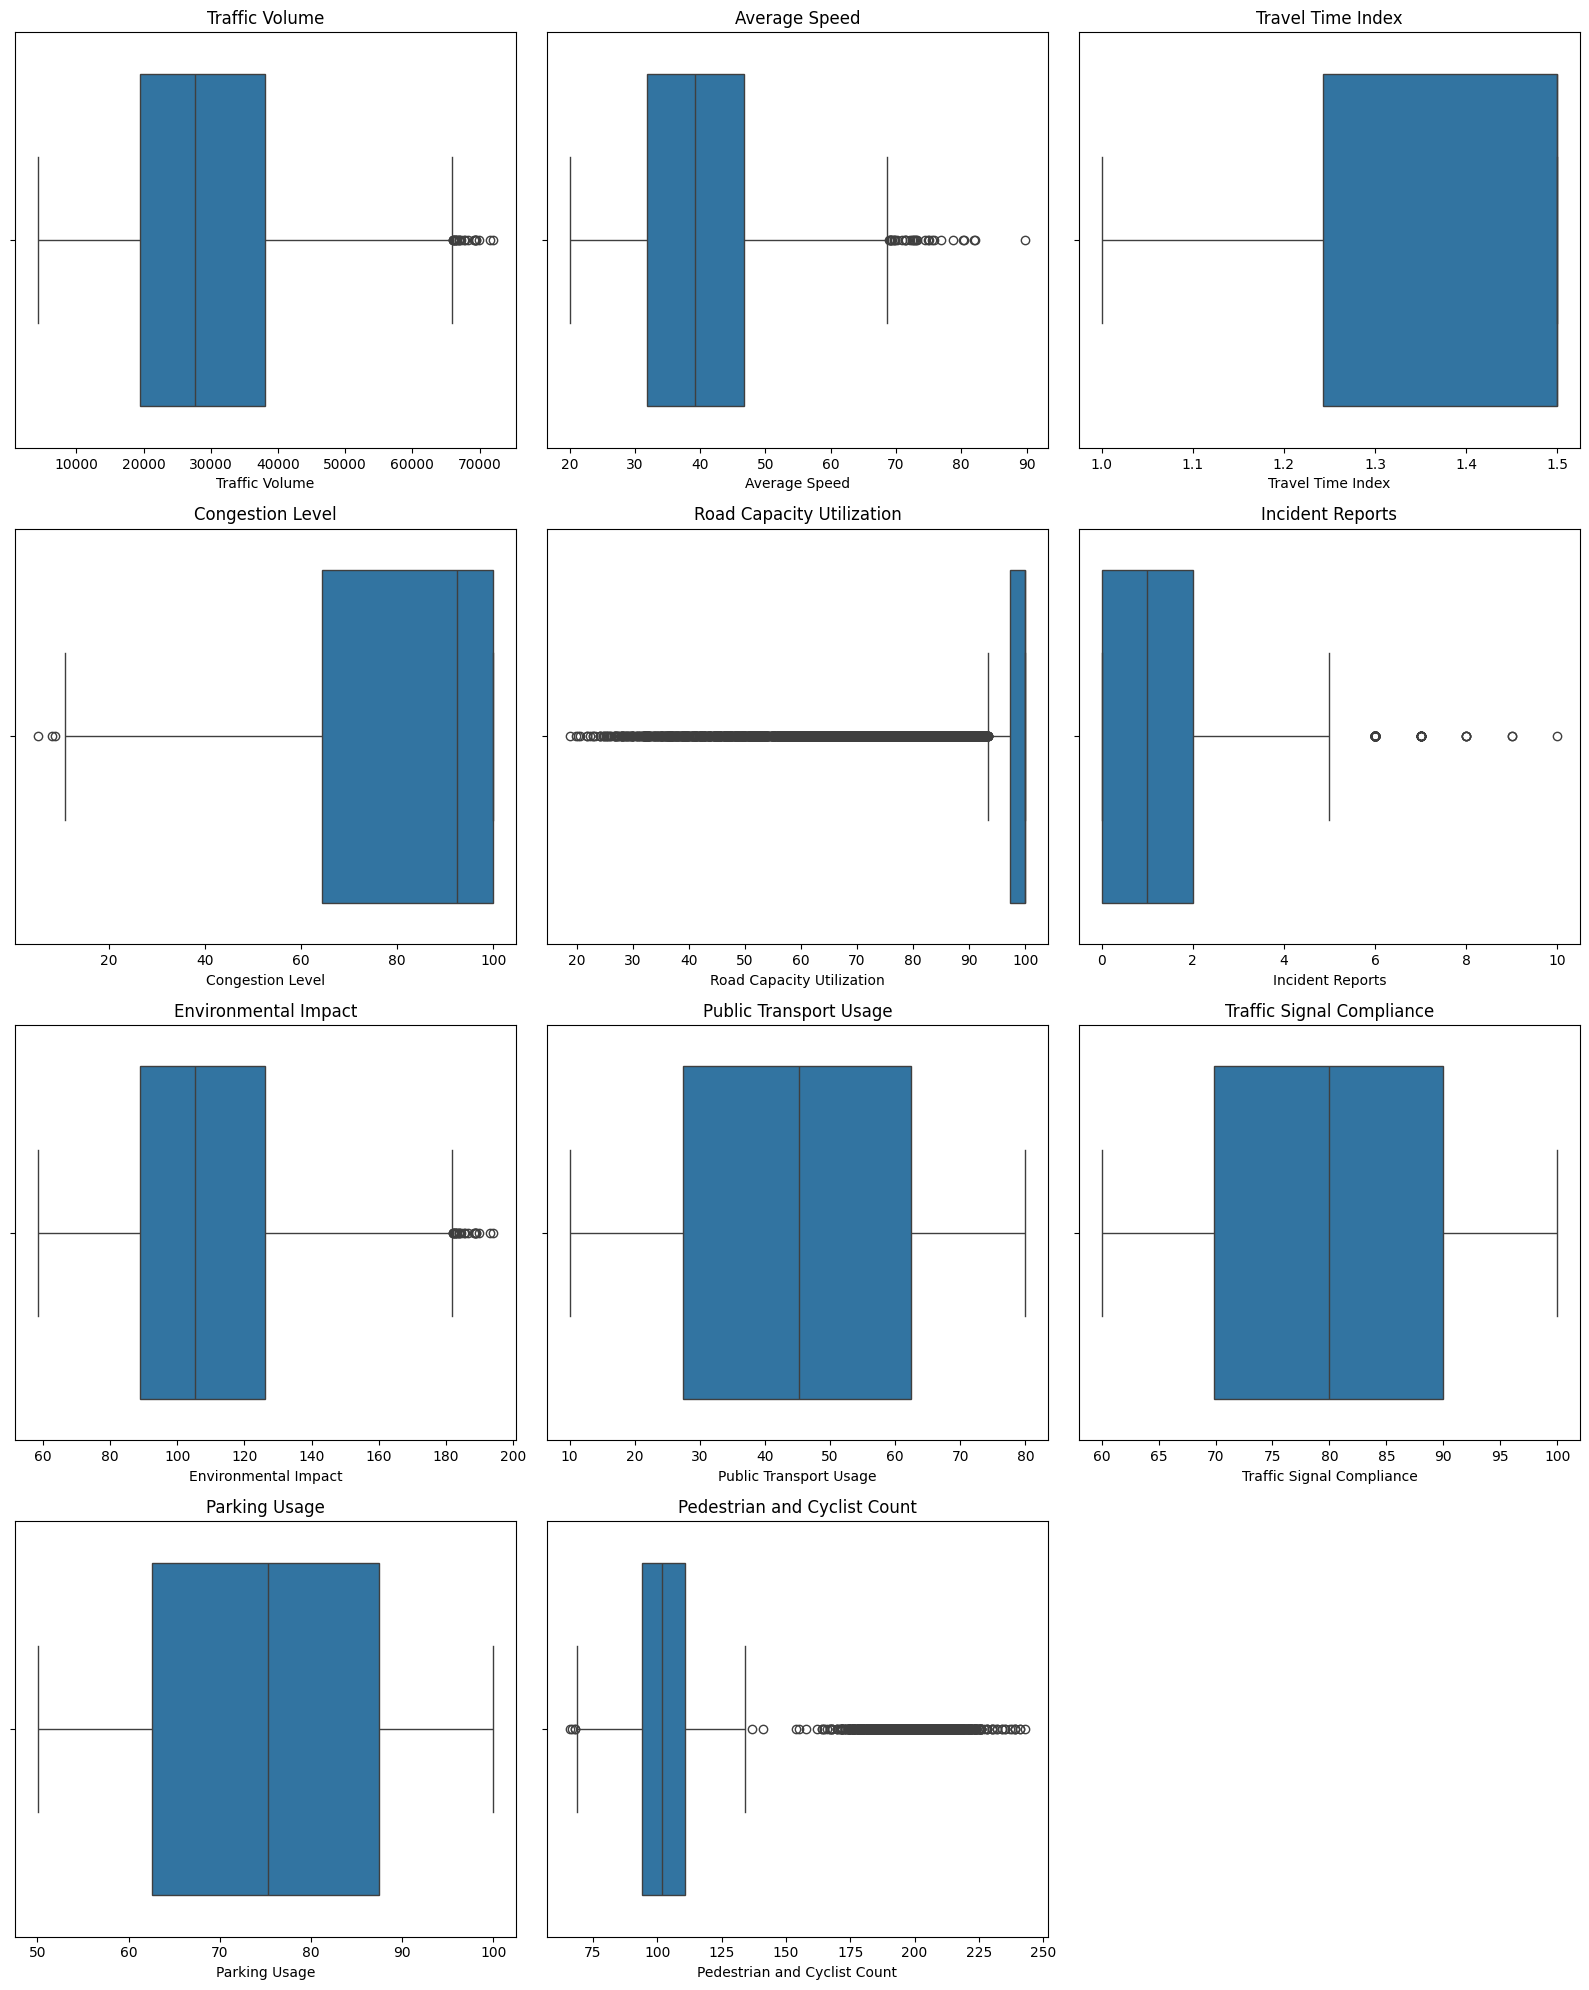

In [10]:
plt.figure(figsize=(16, 20))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


### Correlation Heatmap


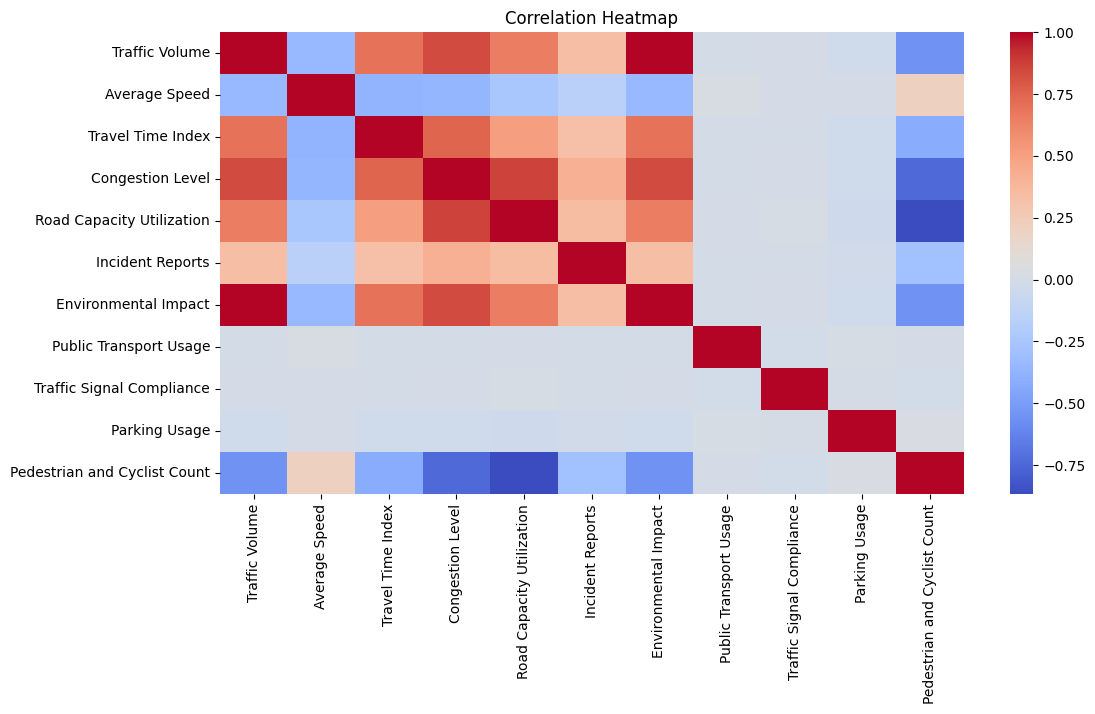

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# 4. Data Cleaning

In this section we correct data types, remove invalid values and prepare a cleaned version of the dataset for feature engineering.


In [12]:
df_clean = df.copy()
df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')


In [13]:
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    df_clean = df_clean[df_clean[col] >= 0]
    

In [14]:
df_clean = df_clean.reset_index(drop=True)


# 5. Feature Engineering

In this section we engineer new features including the custom target variable (Minutes Wasted) based on ideal vs actual travel time.


In [15]:
df_fe = df_clean.copy()


In [17]:
ideal_speed = df_fe['Average Speed'].quantile(0.95)
ideal_speed


np.float64(57.57301111833921)

In [18]:
df_fe['Distance_km'] = 1.0


In [21]:
df_fe['Actual_Time_Min'] = (df_fe['Distance_km'] / df_fe['Average Speed']) * 60

In [22]:
df_fe['Ideal_Time_Min'] = (df_fe['Distance_km'] / ideal_speed) * 60


In [23]:
df_fe['Minutes_Wasted'] = df_fe['Actual_Time_Min'] - df_fe['Ideal_Time_Min']
df_fe['Minutes_Wasted'] = df_fe['Minutes_Wasted'].clip(lower=0)


In [24]:
df_fe[['Actual_Time_Min','Ideal_Time_Min','Minutes_Wasted']].head()


,Actual_Time_Min,Ideal_Time_Min,Minutes_Wasted
0,1.194498,1.042155,0.152343
1,2.042405,1.042155,1.000250
2,1.101435,1.042155,0.059280
3,1.369312,1.042155,0.327157
4,1.459259,1.042155,0.417104


In [26]:
df_fe['Speed_Drop'] = ideal_speed - df_fe['Average Speed']
df_fe['Speed_Drop'] = df_fe['Speed_Drop'].clip(lower=0)
df_fe['Weekend'] = df_fe['Date'].dt.dayofweek >= 5
df_fe['Weekend'] = df_fe['Weekend'].astype(int)


In [27]:
df_fe['Weather_Enc'] = df_fe['Weather Conditions'].astype('category').cat.codes
df_fe['Roadwork_Enc'] = (df_fe['Roadwork and Construction Activity'] == 'Yes').astype(int)


In [31]:
# saving cleaned dataset

df_fe.to_csv("../data/processed/traffic_fe.csv", index=False)
df_clean.to_csv("../data/processed/traffic_cleaned.csv", index=False)


# 6. Feature Selection

Selecting columns to use as inputs for the model and defining the target variable.


In [40]:
### columns to drop for model building

cols_to_drop = [
    'Date',
    'Area Name',
    'Road/Intersection Name',
    'Weather Conditions',
    'Roadwork and Construction Activity',
    'Actual_Time_Min',
    'Ideal_Time_Min'
]

df_model = df_fe.drop(columns = cols_to_drop)

X = df_model.drop("Minutes_Wasted", axis=1)
y = df_model['Minutes_Wasted']

df_model.head()


,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Distance_km,Minutes_Wasted,Speed_Drop,Weekend,Weather_Enc,Roadwork_Enc
0,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,1.0,0.152343,7.342713,1,0,0
1,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,1.0,1.000250,28.195886,1,0,0
2,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,1.0,0.059280,3.098613,1,0,0
3,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,1.0,0.327157,13.755401,1,0,0
4,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,1.0,0.417104,16.456248,1,0,0


# 7. Train Test Split

Splitting the dataset into training and testing subsets so we can train the model on one part and evaluate its performance on unseen data.


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((7148, 16), (1788, 16), (7148,), (1788,))

# 8. Scaling

Scaling numerical features so that each feature contributes proportionally during model training and optimization.


In [122]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 1.64247507,  1.00711962,  0.75280715, ...,  1.57730786,
        -0.6993093 , -0.33092416],
       [ 0.1222169 , -0.94056568,  0.75280715, ...,  1.57730786,
        -0.6993093 , -0.33092416],
       [-1.67963323,  1.40351829, -2.03547927, ...,  1.57730786,
        -0.6993093 , -0.33092416],
       ...,
       [ 1.0449863 , -1.62691662,  0.75280715, ..., -0.63399164,
        -0.6993093 , -0.33092416],
       [-0.66887114,  1.19620778, -2.14768535, ..., -0.63399164,
        -0.6993093 , -0.33092416],
       [-1.11767997, -0.77694371, -1.97709797, ..., -0.63399164,
         1.72154345, -0.33092416]], shape=(8936, 16))

# 9. Modeling

## 9.1 Linear Regression (Scratch, Univariate)

Implementing gradient descent for a single feature to understand the learning dynamics.


In [68]:
# Use just one feature
x_train = X_train_scaled[:, 0]
x_test  = X_test_scaled[:, 0]

# reshape for consistency
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

# ensure y is correct shape
y_train_np = y_train.values
y_test_np = y_test.values

y_mean = y_train_np.mean()
y_std = y_train_np.std()

y_train_scaled = (y_train_np - y_mean) / y_std



In [69]:
w = 0
b = 0
lr = 0.0001
epochs = 2000

losses = []


In [70]:
for i in range(epochs):
    y_pred = w * x_train + b
    error = y_pred - y_train_scaled

    dw = (1/len(x_train)) * np.dot(error, x_train)
    db = (1/len(x_train)) * np.sum(error)

    w -= lr * dw
    b -= lr * db

    cost = np.mean(error**2)
    losses.append(cost)


In [71]:
y_pred_unscaled = y_pred * y_std + y_mean


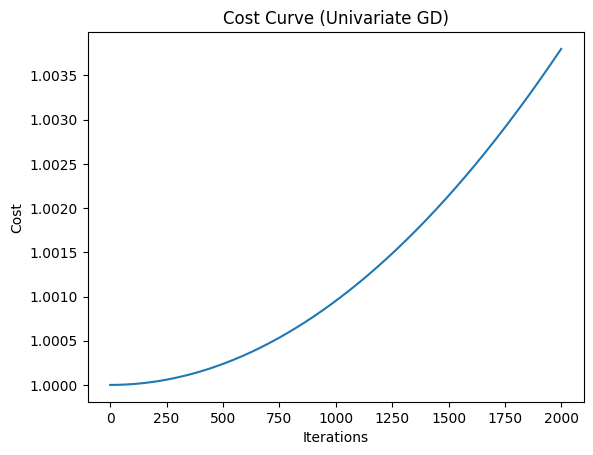

In [72]:
plt.plot(losses)
plt.title("Cost Curve (Univariate GD)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()


## 9.2 Linear Regression (Scratch, Vectorized)

Implementing multivariate linear regression using vectorized gradient descent to learn all feature weights simultaneously.


In [95]:
y_test

554     0.464327
6304    1.173626
1330    0.590503
6884    0.000000
4801    1.097254
          ...   
476     0.383961
4252    0.456549
6764    0.302276
2918    0.278944
211     0.418577
Name: Minutes_Wasted, Length: 1788, dtype: float64

In [83]:
# convert X + y to numpy
X_train_np = X_train_scaled
y_train_np = y_train.values.reshape(-1,1)

# number of samples and features
m, n = X_train_np.shape

# initialize weights
W = np.zeros((n,1))
b = 0

lr = 0.001
epochs = 2000

losses_vec = []

for i in range(epochs):
    
    # predictions
    y_pred = X_train_np.dot(W) + b     # vectorized
    
    # error
    error = y_pred - y_train_np        # (m,1)
    
    # gradients
    dW = (1/m) * X_train_np.T.dot(error) 
    db = (1/m) * np.sum(error)
    
    # update
    W -= lr * dW
    b -= lr * db
    
    # cost
    cost = np.mean(error**2)
    losses_vec.append(cost)


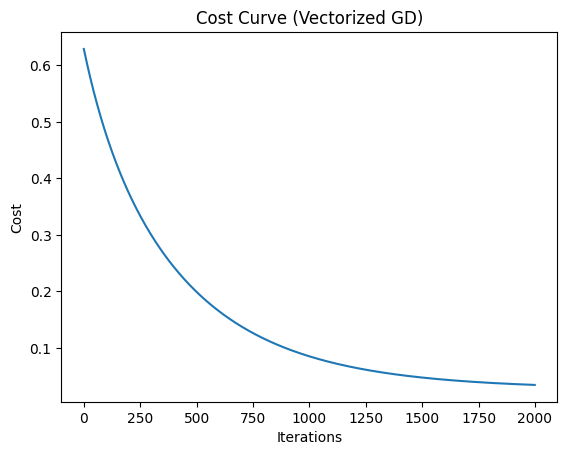

In [79]:
plt.plot(losses_vec)
plt.title("Cost Curve (Vectorized GD)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()


## 9.3 Linear Regression (Sklearn)

Training a baseline linear regression model using sklearn for comparison with the scratch implementation.


In [98]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

In [102]:
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)

lr_mae, lr_rmse, lr_r2


(0.11804928286576087, np.float64(0.14823215158346892), 0.9066027946043723)

In [103]:
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr_model.coef_[0]
})

coef_df.sort_values(by='coefficient', ascending=False)


,feature,coefficient
0,Traffic Volume,-0.000026
1,Average Speed,-0.000026
2,Travel Time Index,-0.000026
3,Congestion Level,-0.000026
4,Road Capacity Utilization,-0.000026
5,Incident Reports,-0.000026
6,Environmental Impact,-0.000026
7,Public Transport Usage,-0.000026
8,Traffic Signal Compliance,-0.000026
9,Parking Usage,-0.000026


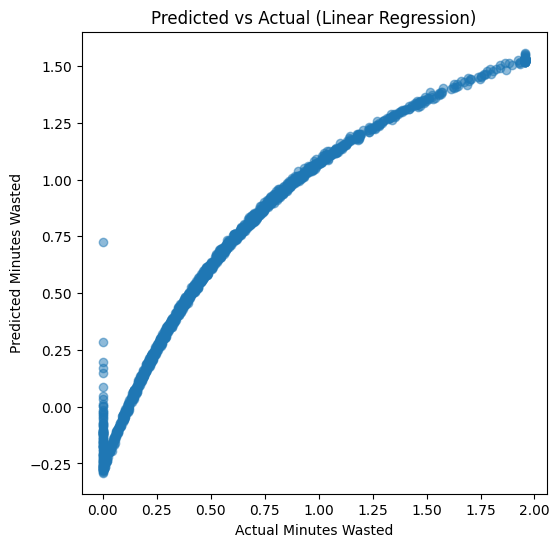

In [99]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel("Actual Minutes Wasted")
plt.ylabel("Predicted Minutes Wasted")
plt.title("Predicted vs Actual (Linear Regression)")
plt.show()


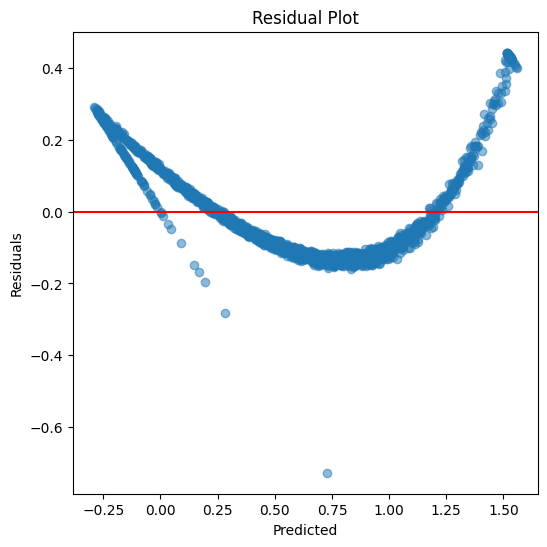

In [100]:
residuals = y_test - y_pred_lr

plt.figure(figsize=(6,6))
plt.scatter(y_pred_lr, residuals, alpha=0.5)
plt.axhline(0, color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


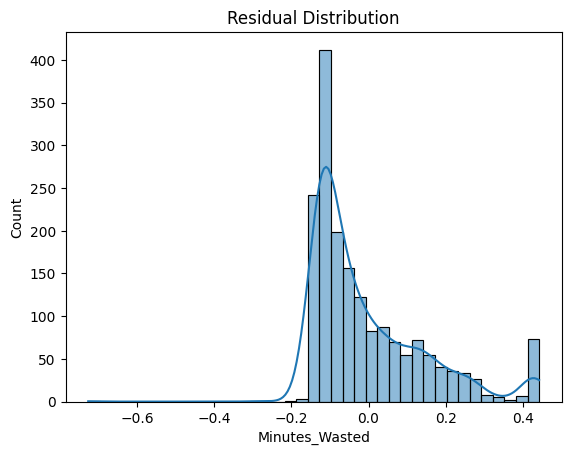

In [101]:
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()


## 9.4 Ridge Regression

Ridge adds L2 regularization which reduces coefficient magnitude and helps the model handle noisy and highly correlated features.


In [105]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = r2_score(y_test, y_pred_ridge)

ridge_mae, ridge_rmse, ridge_r2


(0.11808329837269321, np.float64(0.1482175515585449), 0.9066211918867235)

In [106]:
ridge_coef = pd.DataFrame({
    'feature': X.columns,
    'coefficient': ridge.coef_[0],
    'abs_coef': np.abs(ridge.coef_[0])
})

ridge_coef.sort_values(by='abs_coef', ascending=False)



,feature,coefficient,abs_coef
0,Traffic Volume,-0.00004,0.00004
1,Average Speed,-0.00004,0.00004
2,Travel Time Index,-0.00004,0.00004
3,Congestion Level,-0.00004,0.00004
4,Road Capacity Utilization,-0.00004,0.00004
5,Incident Reports,-0.00004,0.00004
6,Environmental Impact,-0.00004,0.00004
7,Public Transport Usage,-0.00004,0.00004
8,Traffic Signal Compliance,-0.00004,0.00004
9,Parking Usage,-0.00004,0.00004


## 9.5 Lasso Regression

Lasso adds L1 regularization which can shrink coefficients to zero. This helps remove weak or noisy features and improves generalization on complex datasets.


In [109]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
lasso_r2 = r2_score(y_test, y_pred_lasso)

lasso_mae, lasso_rmse, lasso_r2


(0.12123287076668739, np.float64(0.17866018289924382), 0.8643235082663513)

In [110]:
lasso_coef = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lasso.coef_,
    'abs_coef': np.abs(lasso.coef_)
})

lasso_coef.sort_values(by='abs_coef', ascending=False)


,feature,coefficient,abs_coef
12,Speed_Drop,0.376775,0.376775
0,Traffic Volume,0.000000,0.000000
2,Travel Time Index,0.000000,0.000000
1,Average Speed,-0.000000,0.000000
4,Road Capacity Utilization,0.000000,0.000000
5,Incident Reports,0.000000,0.000000
6,Environmental Impact,0.000000,0.000000
3,Congestion Level,0.000000,0.000000
7,Public Transport Usage,-0.000000,0.000000
8,Traffic Signal Compliance,-0.000000,0.000000


# 10. Cross Validation (5-Fold)

Evaluating Linear Regression, Ridge, and Lasso using 5-fold cross-validation to measure real generalization performance beyond a single train-test split.


In [124]:
from sklearn.model_selection import cross_val_score

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1)
}

cv_results = {}

for name, model in models.items():
    neg_mse_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-neg_mse_scores)
    cv_results[name] = {
        "RMSE Mean": rmse_scores.mean(),
        "RMSE Std": rmse_scores.std()
    }
    
cv_results


{'Linear Regression': {'RMSE Mean': np.float64(0.1487555454859117),
  'RMSE Std': np.float64(0.0016327419212876966)},
 'Ridge': {'RMSE Mean': np.float64(0.148752693723376),
  'RMSE Std': np.float64(0.0016511676542439525)},
 'Lasso': {'RMSE Mean': np.float64(0.18441587911620078),
  'RMSE Std': np.float64(0.002920330857981902)}}

# 11. Evaluation

In this section, we compare the performance of Linear Regression, Ridge Regression, and Lasso Regression using MAE, RMSE, and R² scores on the test set.


In [125]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'MAE': [lr_mae, ridge_mae, lasso_mae],
    'RMSE': [lr_rmse, ridge_rmse, lasso_rmse],
    'R2': [lr_r2, ridge_r2, lasso_r2]
})

results


,Model,MAE,RMSE,R2
0,Linear Regression,0.118049,0.148232,0.906603
1,Ridge Regression,0.118083,0.148218,0.906621
2,Lasso Regression,0.121233,0.178660,0.864324


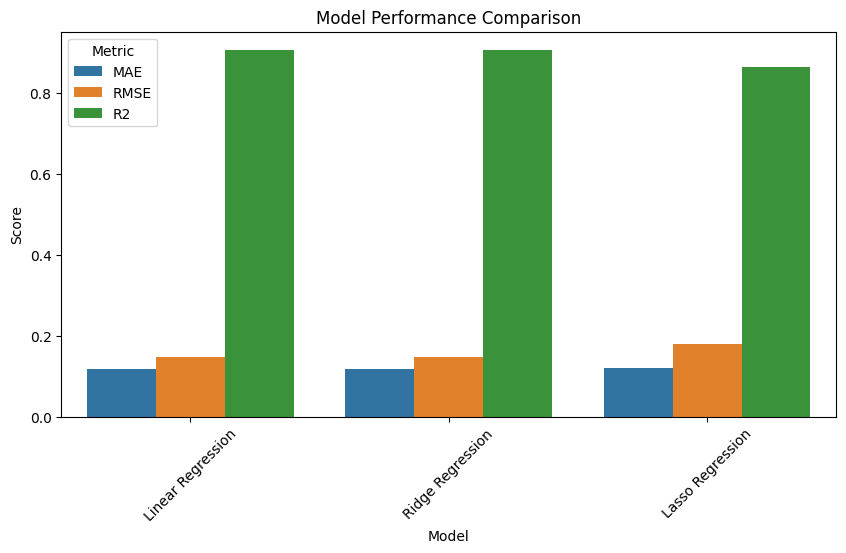

In [126]:
metric_df = results.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10,5))
sns.barplot(data=metric_df, x='Model', y='Score', hue='Metric')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


### Interpretation

- Linear Regression and Ridge Regression perform almost identically on MAE, RMSE, and R².
- Ridge has a slightly better R² and slightly lower RMSE, making it the most stable model.
- Lasso performs significantly worse because the target variable depends on multiple features, and Lasso eliminates weak features, causing underfitting.
- Overall, Ridge provides the best balance of performance and stability for this dataset.


# 12. Visualizations

This section summarizes all important visual insights from the dataset and model performance. It includes relationship plots, cost curves, residual patterns, and model prediction behavior.


### 12.1 Correlation Heatmap

The heatmap revealed strong relationships between congestion, travel time index, and minutes wasted.


In [127]:
# already did it in eda

### 12.2 Feature Distributions

These distributions helped identify skewness in traffic volume, congestion level, and environmental impact.


In [128]:
# did in eda

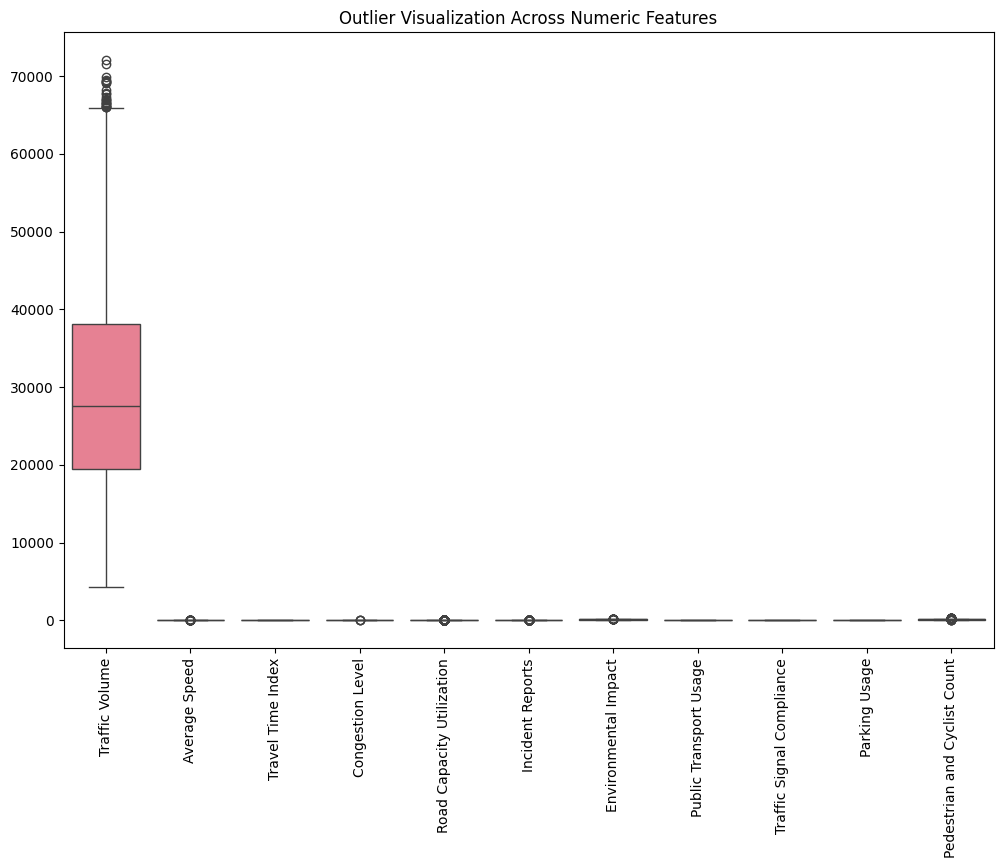

In [129]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Outlier Visualization Across Numeric Features")
plt.show()


### 12.4 Gradient Descent Cost Curve (Scratch)

This plot shows convergence behavior during gradient descent for the vectorized implementation.


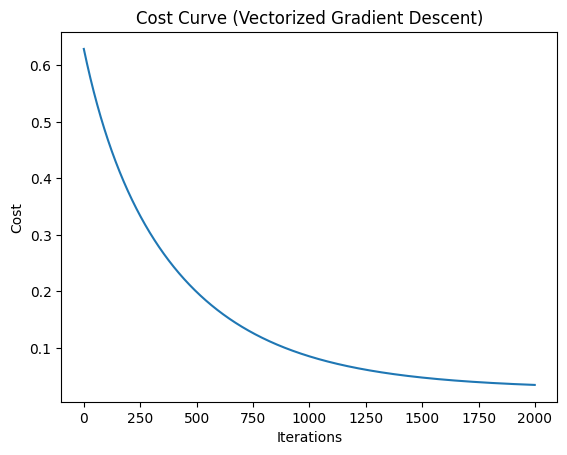

In [130]:
plt.plot(losses_vec)
plt.title("Cost Curve (Vectorized Gradient Descent)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()


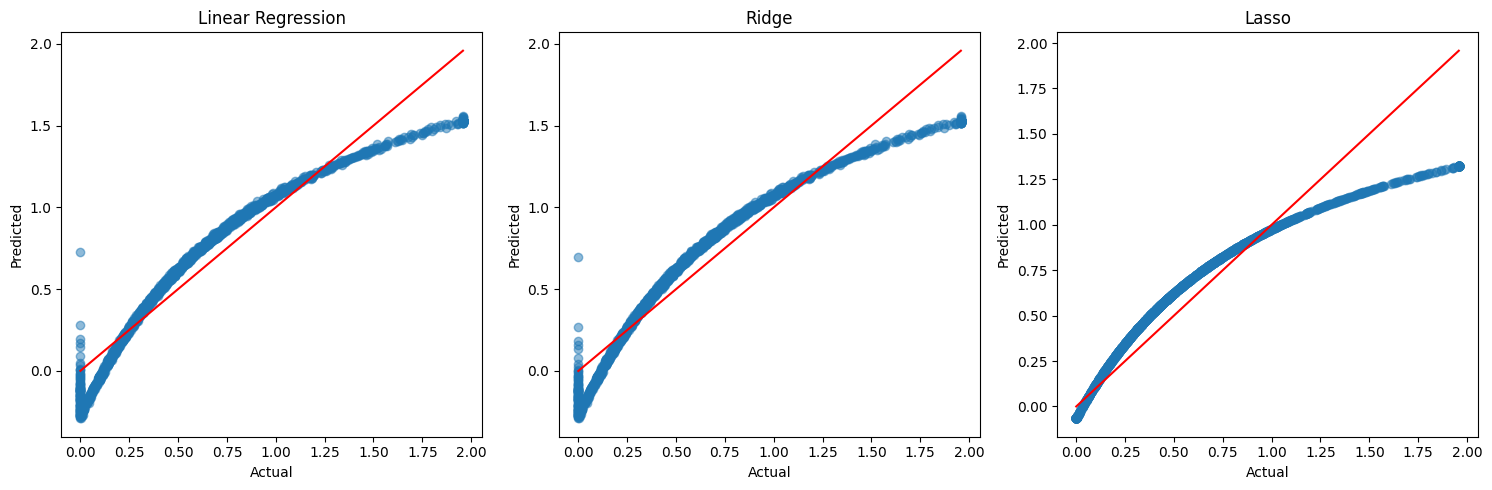

In [131]:
models = {
    "Linear Regression": y_pred_lr,
    "Ridge": y_pred_ridge,
    "Lasso": y_pred_lasso
}

plt.figure(figsize=(15,5))

for i, (name, pred) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
    plt.title(name)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")

plt.tight_layout()
plt.show()


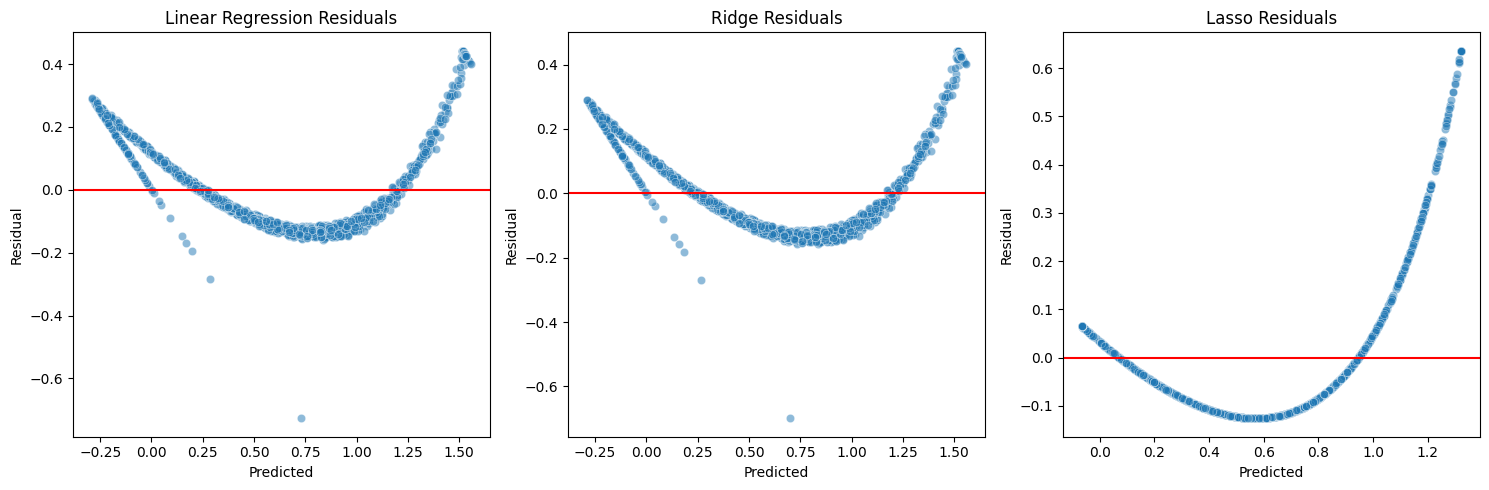

In [132]:
plt.figure(figsize=(15,5))

for i, (name, pred) in enumerate(models.items(), 1):
    residuals = y_test - pred
    plt.subplot(1, 3, i)
    sns.scatterplot(x=pred, y=residuals, alpha=0.5)
    plt.axhline(0, color='red')
    plt.title(f"{name} Residuals")
    plt.xlabel("Predicted")
    plt.ylabel("Residual")

plt.tight_layout()
plt.show()


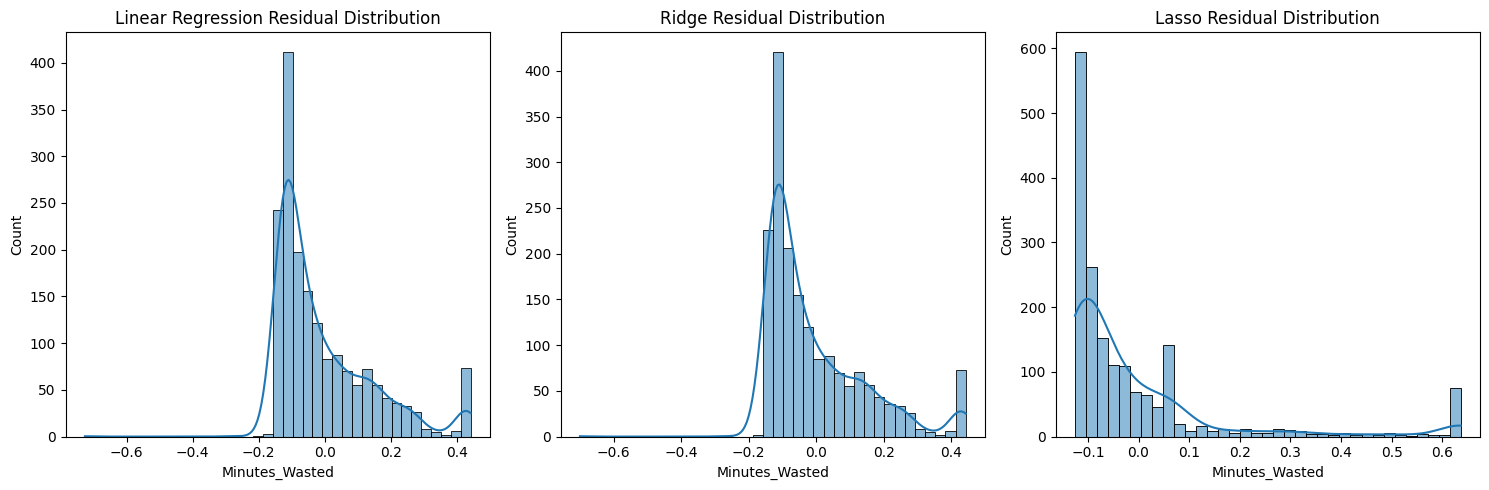

In [133]:
plt.figure(figsize=(15,5))

for i, (name, pred) in enumerate(models.items(), 1):
    residuals = y_test - pred
    plt.subplot(1, 3, i)
    sns.histplot(residuals, kde=True)
    plt.title(f"{name} Residual Distribution")

plt.tight_layout()
plt.show()


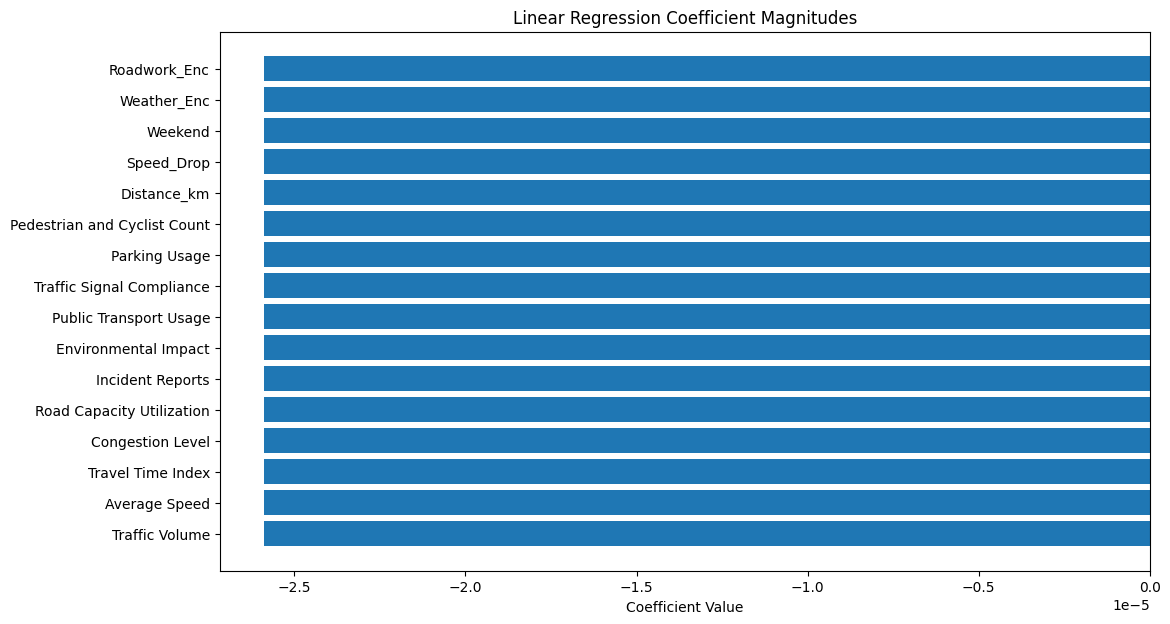

In [134]:
plt.figure(figsize=(12,7))
coef_df = coef_df.sort_values("coefficient")
plt.barh(coef_df['feature'], coef_df['coefficient'])
plt.title("Linear Regression Coefficient Magnitudes")
plt.xlabel("Coefficient Value")
plt.show()


# 13. Insights and Learnings

1) Traffic delay is non-linear
Minutes wasted does not follow a simple linear relationship. Even the best linear models show a curved prediction pattern, meaning real traffic behavior is more complex.

2) Univariate gradient descent is useless for real-world targets
Using one feature gave exploding or drifting cost curves. Real targets depend on many factors, so multivariate vectorized GD is the only sensible approach.

3) Vectorization changes everything
Loop-based gradient descent took minutes and failed.
Vectorized GD worked in ~0.2 seconds.
Linear algebra is the backbone of real ML.

4) Regularization impact

    Ridge improves stability without changing performance much.

    Lasso performs worst because traffic delay depends on many features; removing small features hurts predictions.

5) Linear models hit a ceiling
All three linear models saturated around R² ≈ 0.90–0.91.
This is the maximum a linear function can extract from inherently non-linear traffic patterns.

6) Scaling is essential
Without feature scaling, gradient descent explodes.
Scaled inputs + appropriate learning rate = stable convergence.

7) The dataset is clean and highly structured
Minimal missing values or anomalies meant the majority of effort went into modeling, not cleaning.

8) Feature engineering matters
Derived features like speed drop, weekend indicator, roadwork encoding, and minutes wasted helped improve signal quality.

# 14. Conclusion

This project built a complete end-to-end traffic delay prediction system using real-world Bengaluru traffic data. After cleaning, engineering features, scaling inputs, and comparing multiple linear models, the results showed:

Linear Regression and Ridge perform almost identically with strong accuracy (R² ≈ 0.906).

Lasso underperforms because traffic delay depends on many interacting features; aggressively removing small coefficients hurts generalization.

Vectorized gradient descent is the correct approach, while univariate GD is only useful for learning purposes.

Minutes Wasted is a fundamentally non-linear target, which limits maximum performance of linear models.

Overall, the project demonstrates solid ML engineering fundamentals:

    - correct preprocessing

    - strong feature engineering

    - stable regularization

    - proper evaluation and diagnostics

    -clean visualization suite

The notebook delivers a complete, reproducible workflow and establishes a strong foundation for future upgrades using non-linear models like Random Forest or Gradient Boosting.